In [1]:
# local dependencies
from load import *
from plots import *
from clustering_helpers import *
from constants import *
from helpers import *

***
**Cluster analysis**
***

In this notebook, we will perform cluster analysis on both the PDX and the tumor patient datasets. To support the interpretation and evaluation of clustering models, we will compute the [silhouette coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) and the [Davis-Boudin index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html). For the PDX dataset we will also compute the [adjusted Rand index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html).
The clustering methods used for the analysis are [Agglomerative Clustering](), [K-means](), and [Spectral Clustering]().

*PDX dataset*

In [2]:
pdx = load_pdx()
X_pdx = pdx.drop(columns="label")
y_pdx = pdx.label

REMINDER: Lower the DB index value, better is the clustering
agglomerative db for 2 clusters: 0.72
agglomerative db for 3 clusters: 1.03
agglomerative db for 4 clusters: 0.88
agglomerative db for 5 clusters: 0.77
agglomerative db for 6 clusters: 0.65
kmeans db for 2 clusters: 1.37
kmeans db for 3 clusters: 1.02
kmeans db for 4 clusters: 0.91
kmeans db for 5 clusters: 0.83
kmeans db for 6 clusters: 0.84
spectral db for 2 clusters: 3.17
spectral db for 3 clusters: 1.41
spectral db for 4 clusters: 1.91
spectral db for 5 clusters: 2.01
spectral db for 6 clusters: 1.45
meanshift db for 2 clusters: 0.77
meanshift db for 3 clusters: 0.77
meanshift db for 4 clusters: 0.77
meanshift db for 5 clusters: 0.77
meanshift db for 6 clusters: 0.77
agglomerative score for 2 clusters: 0.03
agglomerative score for 3 clusters: 0.02
agglomerative score for 4 clusters: -0.03
agglomerative score for 5 clusters: 0.02
agglomerative score for 6 clusters: 0.01
kmeans score for 2 clusters: 0.01
kmeans score for 3 

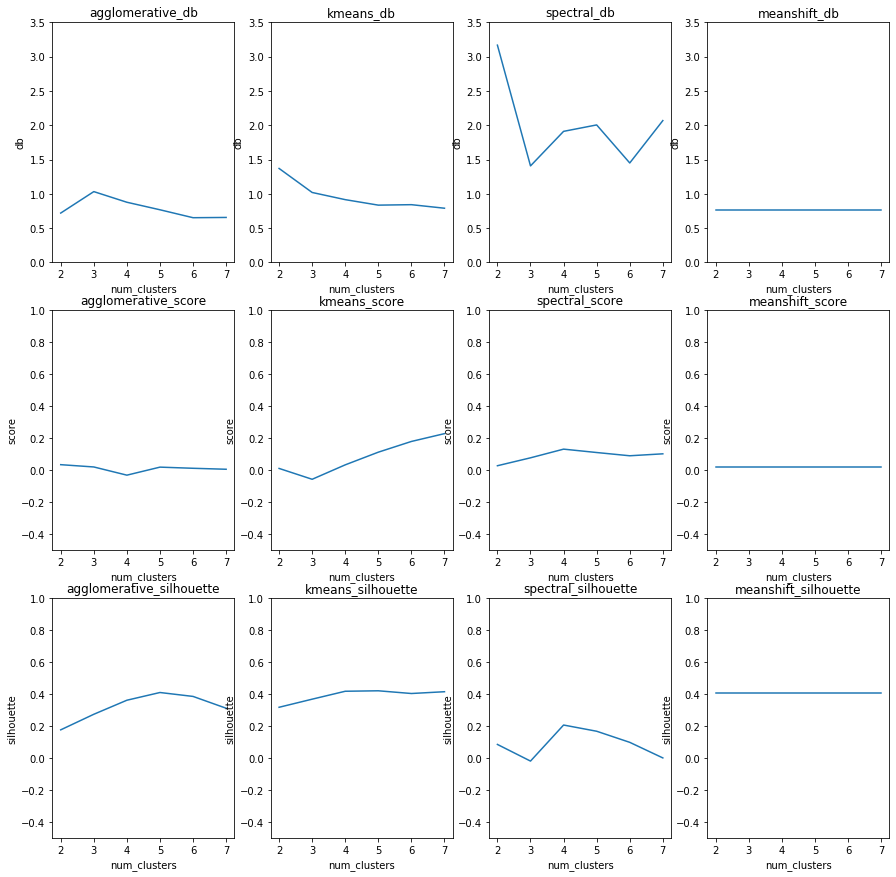

In [3]:
test_all_methods(X_pdx, y_pdx, with_score=True)

In [4]:
X_pdx_stdized = pdx_standardize(X_pdx)

REMINDER: Lower the DB index value, better is the clustering
agglomerative db for 2 clusters: 0.44
agglomerative db for 3 clusters: 0.53
agglomerative db for 4 clusters: 0.52
agglomerative db for 5 clusters: 0.65
agglomerative db for 6 clusters: 0.67
kmeans db for 2 clusters: 1.65
kmeans db for 3 clusters: 1.83
kmeans db for 4 clusters: 1.18
kmeans db for 5 clusters: 1.46
kmeans db for 6 clusters: 1.18
spectral db for 2 clusters: 2.59
spectral db for 3 clusters: 3.09
spectral db for 4 clusters: 1.90
spectral db for 5 clusters: 1.56
spectral db for 6 clusters: 2.17
meanshift db for 2 clusters: 0.52
meanshift db for 3 clusters: 0.52
meanshift db for 4 clusters: 0.52
meanshift db for 5 clusters: 0.52
meanshift db for 6 clusters: 0.52
agglomerative score for 2 clusters: -0.01
agglomerative score for 3 clusters: 0.03
agglomerative score for 4 clusters: 0.07
agglomerative score for 5 clusters: 0.06
agglomerative score for 6 clusters: 0.11
kmeans score for 2 clusters: 0.40
kmeans score for 3 

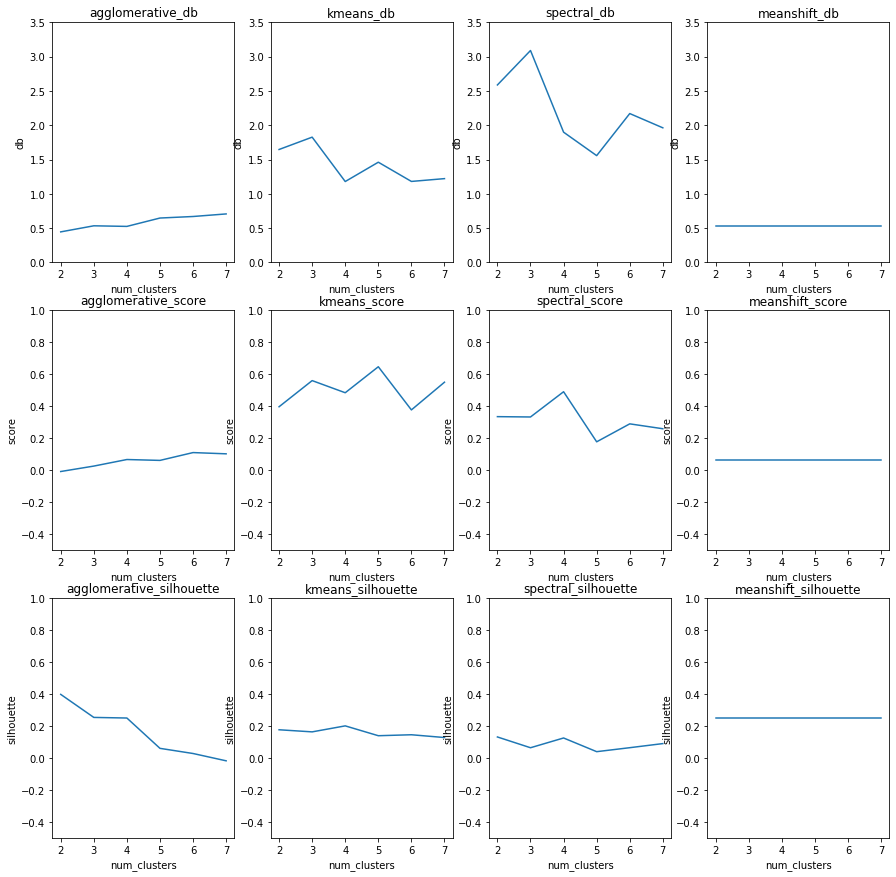

In [5]:
test_all_methods(X_pdx_stdized, y_pdx, with_score=True)

*Patient dataset*

In [6]:
patients2 = load_patients2()
pats_log = np.log(patients2 + .1)  # add a small constant because log(0) is undefined
pats_log_stdized = df_standardize_columns(pats_log)

In [7]:
#test_all_methods(pats_log_stdized)

REMINDER: Lower the DB index value, better is the clustering


LinAlgError: the leading minor of order 4 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.

### How about a little PCA?

#### pdx

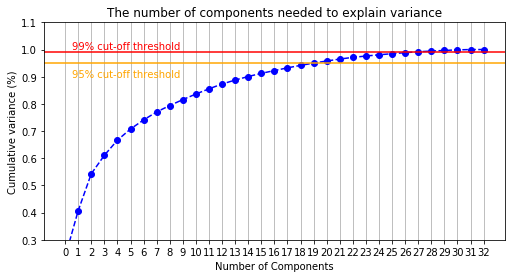

33


In [8]:
pca = PCA()
pca.fit(X_pdx_stdized)

plot_pca_expl_var(pca)

print(pca.n_components_)

Take 10 components

In [125]:
#X_pdx_stdized_noctrl = X_pdx_stdized.drop('ctrl')
X_pdx_stdized_noctrl

ABCA13   ADAMTS1   ADAMTS8       ALB   ALOX15B  \
treatment tumor id                                                         
dht       t111  g2_m02  2.338244 -2.912616  1.183711 -2.800739 -0.749347   
                g2_m06  1.593399 -0.901234  1.622265 -0.909251  1.168950   
                g2_m09 -0.603074  0.182598  1.363505  0.174547  0.032089   
e2        pl015 g3_m25  0.788390  0.480544  0.247713 -0.809384  1.203151   
                g3_m26  1.325698 -0.314950  0.079748  1.477236  1.282419   
                g3_m33  1.234718 -0.324597 -0.211895  1.048895  1.562522   
                g3_m39  1.303711  1.423294  0.544798  1.553641  0.856093   
          t110  g2_m03 -0.294406 -0.433153  0.965095 -0.646837  0.227560   
                g2_m09 -0.778285 -0.258867  0.090141 -0.755855  1.811897   
          t111  g2_m03 -0.235131  0.196568 -0.924998  0.059301  1.753256   
                g2_m10 -0.603074  0.313514 -0.258086 -0.041157  1.186370   
                g2_m12 -0.603074  0.403686 -0.756245  0.188575  1.104763   
p4        pl015 g3_m28 -0.400643  0.250486  0.107515 -0.836004 -0.536890   
                g3_m29 -1.143646 -0.637125 -0.350675 -0.966049 -0.375462   
                g3_m35 -1.043512 -1.017925  0.260523 -0.306838 -0.986940   
                g3_m38 -0.552889 -1.694622  1.310113 -0.055308 -0.904651   
          t110  g2_m05  2.256566 -1.399684 -0.508005 -0.822064 -0.659889   
                g2_m07 -0.292073 -0.571449 -0.508005 -1.163648 -0.659889   
                g2_m12 -0.878598  0.331991 -0.508005  0.337800 -0.659889   
                g2_m13 -0.754558  2.334336  2.500797  2.315025  1.737616   
          t111  g2_m07  0.619371  0.461223 -1.183212  0.743198 -0.749347   
                g2_m14 -0.603074  0.579682  0.538126  0.188846 -0.749347   
                g2_m15 -0.603074  0.643725  0.238569  0.379916 -0.749347   

                          ATP1A2     BICD1   CACNA1H      CISH    CITED1  ...  \
treatment tumor id                                                        ...   
dht       t111  g2_m02 -0.957427  0.502898  0.500515  1.011551 -2.448131  ...   
                g2_m06 -0.957427 -0.386578  2.107445  2.185460  1.062863  ...   
                g2_m09 -0.957427 -1.551498  1.452285  1.022309  0.769480  ...   
e2        pl015 g3_m25  0.994290  0.898086  2.106345 -0.911224  0.934726  ...   
                g3_m26  0.962014  1.075818 -0.456842 -0.787815 -1.017994  ...   
                g3_m33  1.494484  1.287970 -1.101160 -0.931971 -1.017994  ...   
                g3_m39  1.452353  1.016291 -0.208182 -0.629306 -1.017994  ...   
          t110  g2_m03  0.634235  1.262053  0.682658 -0.306414 -0.798406  ...   
                g2_m09  0.639472  1.620316  0.495163 -0.682339 -0.772734  ...   
          t111  g2_m03 -0.957427  0.964059 -0.467405 -1.010089 -0.738208  ...   
                g2_m10 -0.957427  1.344155 -0.338644 -0.526864 -0.664459  ...   
                g2_m12 -0.957427  1.165538 -1.165909 -1.010089 -0.835258  ...   
p4        pl015 g3_m28 -0.929874 -1.247813  0.542484  0.698532 -1.017994  ...   
                g3_m29 -0.607984 -0.908024  0.134739  0.954624  1.164061  ...   
                g3_m35 -0.929874 -1.138127  0.087318  1.699034 -1.017994  ...   
                g3_m38 -0.535384 -1.122859  1.124593  1.459755  0.324905  ...   
          t110  g2_m05 -0.043441 -0.256782  0.240676 -0.682339  0.155671  ...   
                g2_m07  0.666235 -0.438207 -1.017326 -0.682339 -0.113683  ...   
                g2_m12  0.644828 -1.724307 -1.017326  0.479532  0.478180  ...   
                g2_m13 -2.567944 -1.118886  1.958492  2.576594  2.387601  ...   
          t111  g2_m07 -0.957427  0.029391  0.663217 -1.010089  0.212561  ...   
                g2_m14 -0.957427 -0.638864 -0.737197  0.228054  0.499969  ...   
                g2_m15 -0.957427 -0.608391  0.060182  0.408773  0.743060  ...   

                         TNFAIP3      TP63     TPSG1    TSPAN8   UGT2B11  \
treatment tumor id     

In [117]:
pdx_components = pca.transform(X_pdx_stdized_noctrl)
pdx_pca = pdx_components[:,:11]

In [126]:
clus = cluster.KMeans(n_clusters=3, random_state=1)
predicted = clus.fit_predict(pdx_pca)

score = metrics.adjusted_rand_score(y_pdx_noctrl, predicted)
silhouette = metrics.silhouette_score(pdx_pca, predicted, metric='euclidean')
db = metrics.davies_bouldin_score(pdx_pca, predicted)

print("score is: " + str(score))
print("silhouette is: " + str(silhouette))
print("db is: " + str(db))

data = pd.DataFrame(pdx_pca[:,:3], columns=["1st PC", "2nd PC", "3rd PC"])
data['predicted'] = y_pdx_noctrl.values
px.scatter_3d(data, x="1st PC", y="2nd PC", z="3rd PC", color='predicted')

score is: 0.5510855889279608
silhouette is: 0.24840637146295358
db is: 1.010083549015536


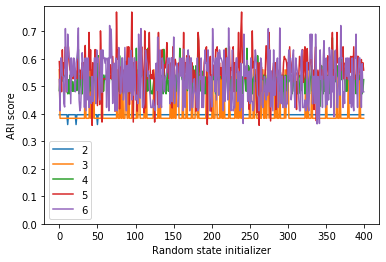

0.7700914409041858
(array([ 75,  95, 239], dtype=int64), array([3, 3, 3], dtype=int64))


In [44]:
# optimize for ARI score

score = np.zeros((400,5))
for j in range(score.shape[1]):
    for i in range(score.shape[0]):
        clus = cluster.KMeans(n_clusters=j+2, random_state=i)
        predicted = clus.fit_predict(pdx_pca)
        score[i,j] = metrics.adjusted_rand_score(y_pdx, predicted)
    
for sc in range(score.shape[1]):
    plt.plot(score[:,sc])
plt.legend(['2','3','4','5','6'])
plt.ylim(bottom=0)
plt.xlabel('Random state initializer')
plt.ylabel('ARI score')
plt.show()
print(score.max())
print(np.where(score==score.max()))

In [45]:
for i in np.arange(score.shape[1]):
    print("Max ARI score for " + str(i+2)+ " clusters: " + str(np.round(100*score[:,i].max()))+str('%'))

Max ARI score for 2 clusters: 40.0%
Max ARI score for 3 clusters: 56.0%
Max ARI score for 4 clusters: 68.0%
Max ARI score for 5 clusters: 77.0%
Max ARI score for 6 clusters: 72.0%


#### patients

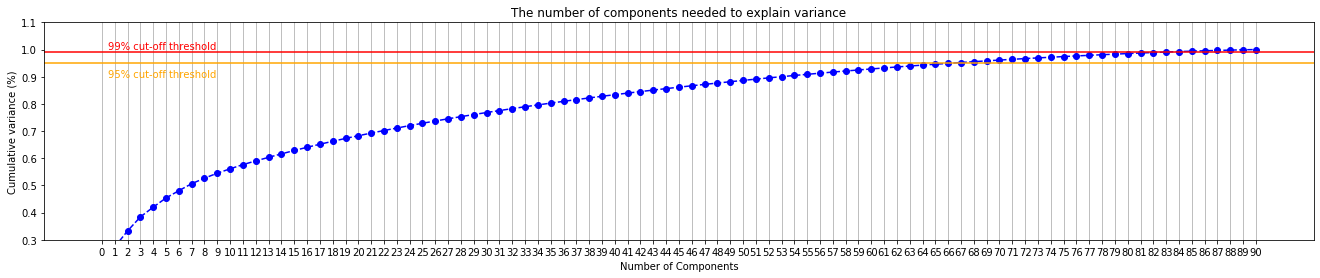

In [41]:
pca.fit(pats_log_stdized)

plot_pca_expl_var(pca, 91)

Take 67 components

In [55]:
pats_components = pca.transform(pats_log_stdized)
pats_pca = pats_components[:,:68]

In [107]:
clus = cluster.KMeans(n_clusters=4, random_state=0)
predicted = clus.fit_predict(pats_pca)

silhouette = metrics.silhouette_score(pats_pca, predicted, metric='euclidean')
db = metrics.davies_bouldin_score(pats_pca, predicted)

print("silhouette is: " + str(silhouette))
print("db is: " + str(db))

silhouette is: 0.09321602933073764
db is: 2.5702418252662884


In [108]:
data = pd.DataFrame(pats_pca[:,:3], columns=["1st PC", "2nd PC", "3rd PC"])
data['predicted'] = predicted
px.scatter_3d(data, x="1st PC", y="2nd PC", z="3rd PC", color='predicted')
    

Overall, we get results comparable to the standardized datasets